# Archive Simulation
Following the [previous notebook](example_stream-archive.ipynb), this notebook demonstrates:

1. how to create simulation based on an archive (downloaded with [busdata.streambus](example_busdata.ipynb)) as a pseudo-live stream

with the `simulator` module in the `buskit` package.

## NOTE: 

# 1. Setup

In [1]:
import pandas as pd

import buskit as bk
from buskit import busdata as bdata
from buskit import dashboard as bdash
from buskit import simulator as bsim

## 1.1 Simulation Environment

In [2]:
# specify path to the archive AVL file
archive_path = 'MTA_data/B15-180625-235941-44650-Mon.csv'

# parse stops and set links
stops, links, stop_pos = bsim.set_route(archive_path, 1)

# create empty dictionary storage for bus objects
live_bus = {} # for buses from archive streaming
active_bus = {} # for buses in the simulator

# 2. Simulation
## 2.1 Simulate with visualization (slower)
although there is a rate argument, the actual speed is constrained by plotting time

In [3]:
bsim.plot_sim?

Signature: bsim.plot_sim(filename, direction, live_bus, active_bus, stops, links, stop_pos, sim_time=10, rate=0.1)
Docstring:
visualize a simulation streaming from an archive
sim_time: minutes to simulate
rate: simulate a second per "X" real-world second
File:      ~/Dropbox/work_BusSimulator/buskit/buskit/simulator.py
Type:      function


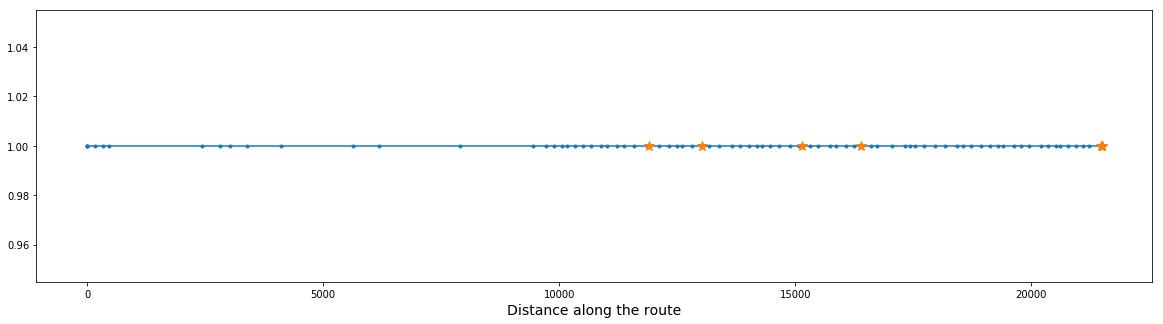

Time elapsed: 1800 seconds


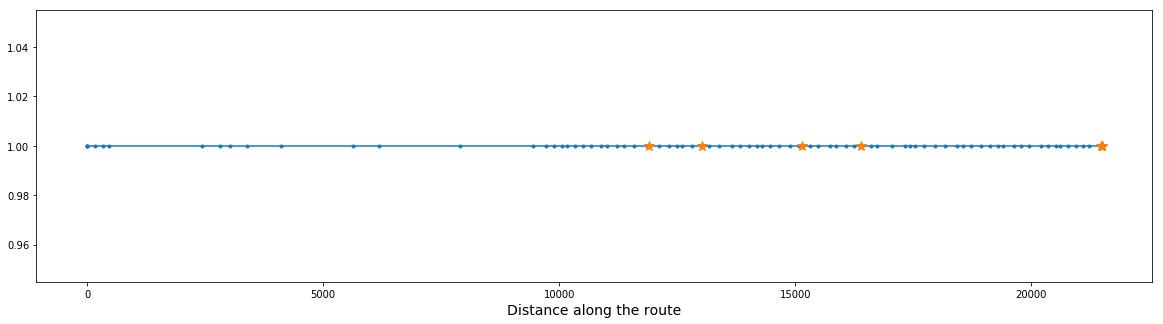

In [4]:
bsim.plot_sim(archive_path, 1, live_bus, active_bus, stops, links, stop_pos, sim_time=30, rate=0.1)

## 2.2 Simulate without visualization
Currently, the dashboard is not built yet; thus, unless you are very interested in having the above tiny moving buses as your screensaver, I would recommend just running the simulation without visualization as below. This stores exactly the same information and results in SimBus objects.

### NOTE: currently it prints out everything, will remove the printing output in the future.

In [3]:
### VERBOSE OUTPUT IS MANUALLY CLEARED AFTER RUNNING ###
bsim.simulate(archive_path, 1, live_bus, active_bus, stops, links, stop_pos, sim_time=200)

## 2.3 Infer
If for any reason, you just want to check the inferring from the streaming data, simply `infer` it. This streams through the data and stores all the inferred information in Stops and Links.

In [4]:
bsim.infer?

Signature: bsim.infer(filename, direction, live_bus, stops, links, stop_pos, runtime=60)
Docstring:
infer link traveling speed and dwelling information from archive
runtime: run the archive stream for "X" minutes
File:      ~/Dropbox/work_BusSimulator/buskit/buskit/simulator.py
Type:      function


# 3. Evaluation
## 3.1 Time-space Diagram (TSD)
### 3.1.1 TSD of the original archive data

/Users/Yuwen/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


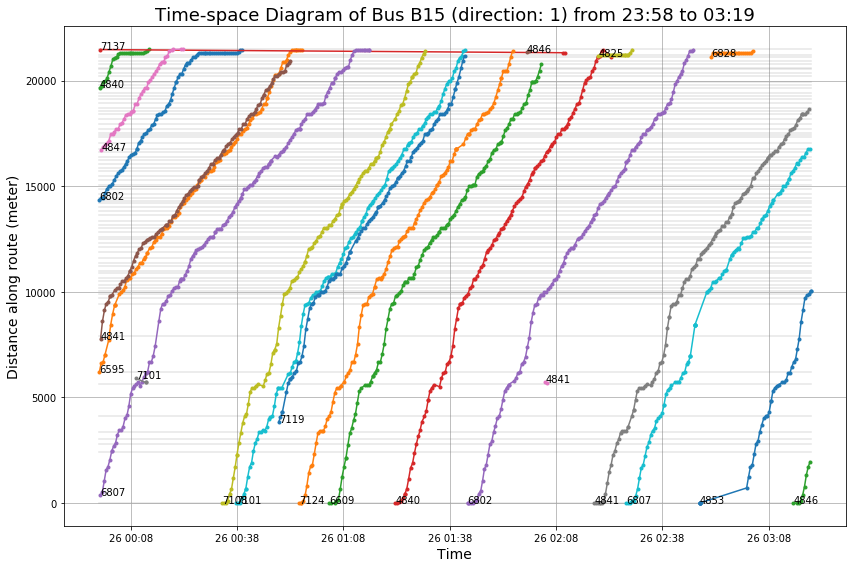

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11ad29ba8>)

In [5]:
# plot TSD for cross-validation
df = pd.read_csv(archive_path)
df = bdata.split_trips(df)
bdata.plot_tsd(df, 1, 0, 201)

### 3.1.2 TSD of the simulation
### NOTE: incomplete bus records are not removed (e.g., 4841); thus, it keeps running in the simulation

/Users/Yuwen/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


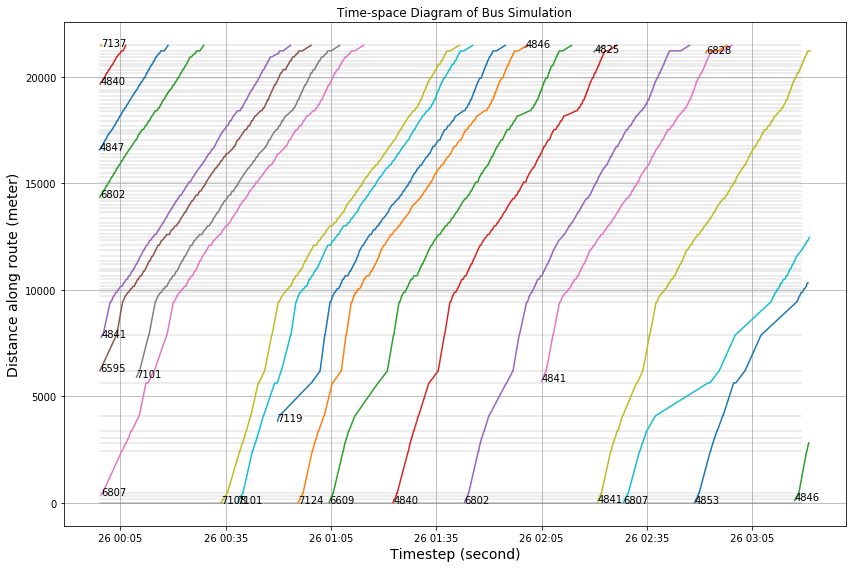

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11c260358>)

In [6]:
bsim.sim_tsd(active_bus, stops, archive_path, 1, 0, 200)

### 3.1.3 TSD of individual vehicle

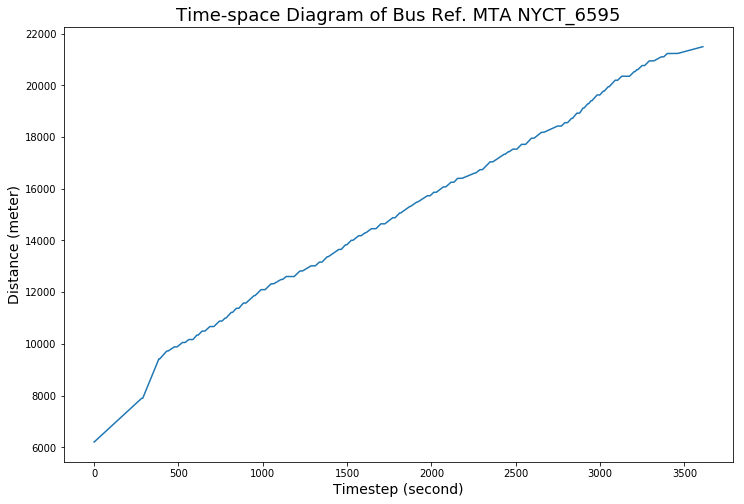

In [7]:
bsim.bus_tsd(active_bus['MTA NYCT_6595'])